# Lab 6 - Principal Component Analysis

#### A large part of the code was taken from <br>
#### 1. https://github.com/ageron/handson-ml <br>
#### 2. https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#### Load the Fashion MNIST dataset

In [0]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
plt.imshow(X_train[0])

In [0]:
X_train.shape

In [0]:
X_train=X_train.reshape(60000, 28*28)

In [0]:
X_train.shape

#### Projecting down to d = 4 dimensions

#### The top *d* principal components are projected onto a hyperplane, which causes the dimensionality of the dataset to be reduced to *d* dimenions.

In [0]:
pca = PCA(n_components = 4)
X_train_pca=pca.fit_transform(X_train)


#### Explained Variance Ratio

In [0]:
pca.explained_variance_ratio_


In [0]:
sns.heatmap(pca.components_[1].reshape(28, 28), cmap='gray_r')

#### Preserving the training set's variance

#### This step automatically selects a certain number of dimensions, that will sum to the specified variance.

In [0]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d1 = np.argmax(cumsum >= 0.25)+1
d2 = np.argmax(cumsum >= 0.50)+1
d3 = np.argmax(cumsum >= 0.75)+1
d4 = np.argmax(cumsum >= 0.95)+1
d5 = np.argmax(cumsum >= 1.00)+1

In [0]:
print("The number of Principal Components required to obtain -\n 1. 25% variance = ",d1," \n 2. 50% variance = ",d2," \n 3. 75% variance =", d3,"\n 4. 95% variance = ",d4,"\n 5. 100% variance = ",d5)

#### Compressing datasets using PCA

#### We can compress datasets using PCA and therefore use it to acclerate ML algorithms!

In [0]:
pca = PCA(n_components = 14)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [13]:
X_train.nbytes

47040000

In [14]:
X_reduced.nbytes

6720000

In [0]:

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Recovered after compression')

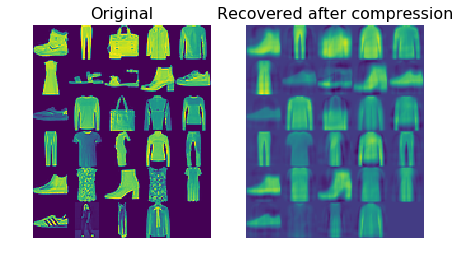

In [16]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Recovered after compression", fontsize=16)



In [0]:
from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression()

log_clf.fit(X_train, y_train)

y_pred = log_clf.predict(X_test)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard') 
voting_clf.fit(X_train, y_train)



Let’s look at each classifier’s accuracy on the test set: 
  

In [0]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  
print(clf.class.name, accuracy_score(y_test, y_pred))